In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Pacbio stock data from Yahoo Finance API
pacb = yf.download('PACB', start='2018-01-01', end='2023-04-18')

[*********************100%***********************]  1 of 1 completed


In [37]:
pacb.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2.67,2.83,2.61,2.79,2.79,811500
2018-01-03,2.82,2.84,2.68,2.69,2.69,732000
2018-01-04,2.70,2.74,2.63,2.71,2.71,1091400
2018-01-05,2.72,2.84,2.70,2.77,2.77,742600
2018-01-08,2.77,2.80,2.67,2.72,2.72,1406800


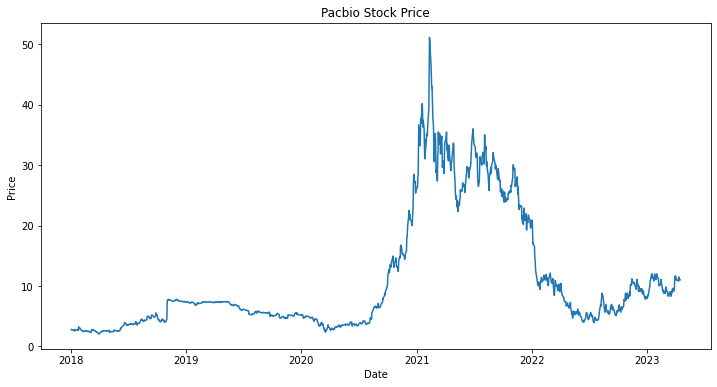

In [38]:
# Plot the closing price of Pacbio stock
plt.figure(figsize=(12,6))
plt.plot(pacb['Close'])
plt.title('Pacbio Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Compute the daily returns of Pacbio stock. This taking the percentage change in the closing price of Pacbio stock from one day to the next

In [39]:
pacb['Returns'] = pacb['Close'].pct_change()


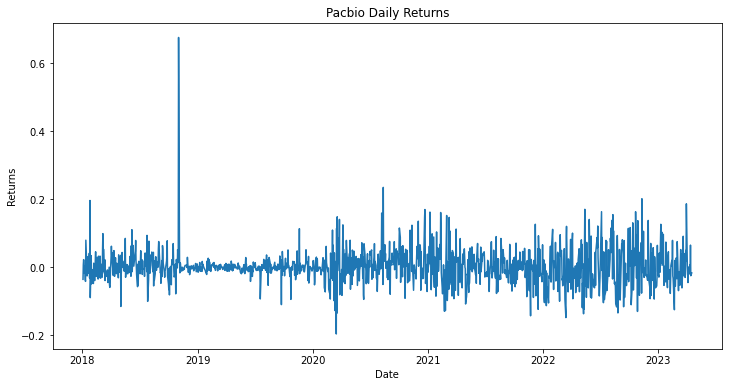

In [40]:
# Plot the daily returns of Pacbio stock
plt.figure(figsize=(12,6))
plt.plot(pacb['Returns'])
plt.title('Pacbio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

There is huge spike towards end of 2018

In [41]:
max_index=pacb['Returns'].idxmax()
print(max_index)

2018-11-02 00:00:00


Looking online. Illumina paid $1.2 billion for Pacbio as report on cnbc Nov 1, 2018

In [42]:
# Compute the rolling mean and standard deviation of Pacbio stock returns
pacb['Rolling Mean'] = pacb['Returns'].rolling(window=30).mean()
pacb['Rolling Std'] = pacb['Returns'].rolling(window=30).std()

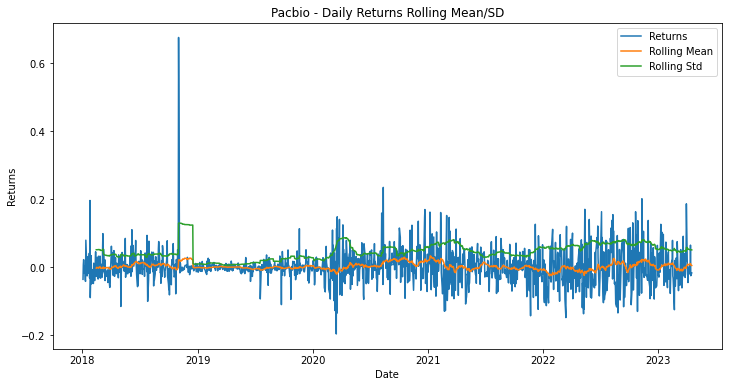

In [43]:
# Plot the rolling mean and standard deviation of Pacbio stock returns
plt.figure(figsize=(12,6))
plt.plot(pacb['Returns'], label='Returns')
plt.plot(pacb['Rolling Mean'], label='Rolling Mean')
plt.plot(pacb['Rolling Std'], label='Rolling Std')
plt.title('Pacbio - Daily Returns Rolling Mean/SD')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


The rolling mean and standard deviation is the average of the returns and SD over a  30-day rolling window. This smooths out noise in the daily returns and highlight underlying trends and patterns.

A positive rolling mean indicates an upward trend in the stock, while a negative rolling mean indicates a downward trend.
Note that the rolling mean is just one indicator of the stock's performance.

Other indicators include profitability (EPS, ROE), valuation (P/E, P/B/, P/S ratio).